In [1]:
import sys
sys.path.append('gym-unbalanced-disk/gym_unbalanced_disk/')
import numpy as np
from matplotlib import pyplot as plt
import gym_unbalanced_disk, time, gym.wrappers
import os

from DQNfunctions import Qfunction, run, load_Qfunction

In [2]:
max_episode_steps = 1000
env = gym_unbalanced_disk.UnbalancedDisk_exp_sincos(umax = 3.0,dt = 0.025)
env = gym.wrappers.time_limit.TimeLimit(env,max_episode_steps=max_episode_steps)
env.set_discrete_values_manual([-3.0, -1.2, -0.48, -0.19, 0, 0.19, 0.48, 1.2, 3.0])
fileName = 'QfunctionFinal.pt'
# load Q-function
Q = load_Qfunction(env, fileName)

starting matlab engine...done
connecting to experimental setup...done
Discrete value set changed to [-3.0, -1.2, -0.48, -0.19, 0, 0.19, 0.48, 1.2, 3.0]


In [3]:
u,theta,omega = run(Q, env)

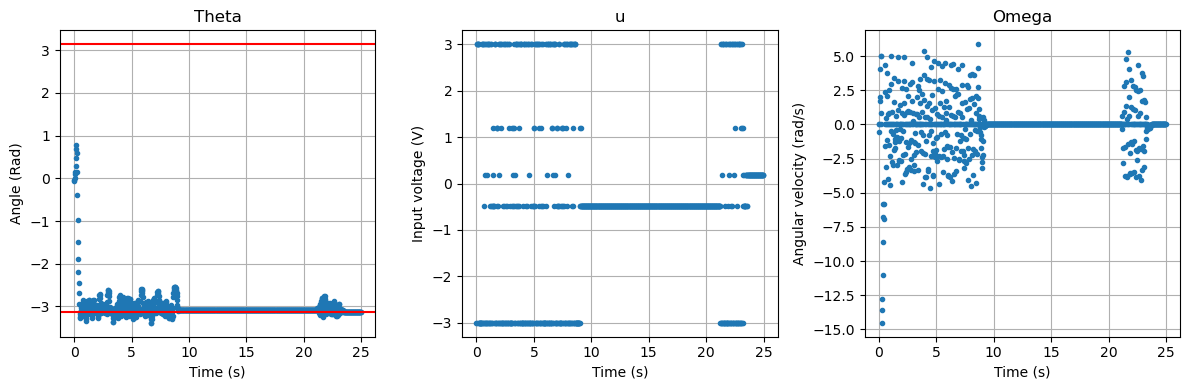

In [4]:
target_angle = np.pi # target set to be balanced on top

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot theta
axs[0].plot([i*env.dt for i in range(max_episode_steps)], theta, '.')
axs[0].set_title('Theta')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Angle (Rad)')
axs[0].axhline(y=target_angle, color='r', linestyle='-')
axs[0].axhline(y=-target_angle, color='r', linestyle='-')
axs[0].grid(True)

# Plot u
axs[1].plot([i*env.dt for i in range(max_episode_steps)], u, '.')
axs[1].set_title('u')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Input voltage (V)')
axs[1].grid(True)

# Plot omega
axs[2].plot([i*env.dt for i in range(max_episode_steps)], omega, '.')
axs[2].set_title('Omega')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Angular velocity (rad/s)')
axs[2].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#Save fig
Save = False
if Save:
    ROOT_DIR = os.path.dirname('')
    fig.savefig(os.path.realpath(os.path.join(ROOT_DIR, os.path.splitext(fileName)[0]+'FigureExperimentDisturbance.eps')), format='eps')
    fig.savefig(os.path.realpath(os.path.join(ROOT_DIR, os.path.splitext(fileName)[0]+'FigureExperimentDisturbance.svg')))
    np.savez(os.path.realpath(os.path.join(ROOT_DIR, os.path.splitext(fileName)[0]+'DataExperimentDisturbance')), theta, u, omega)